In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
from tweets_list import loadJoblib

tweets_list = loadJoblib("list/tweets_list.joblib")

In [4]:
from remove import *

removed_new_line_marks = remove_new_line_marks(tweets_list)
removed_new_line_marks_all_blanks = remove_all_blanks(removed_new_line_marks)

# removed_usermention = remove_usermention(removed_new_line_marks_all_blanks)
removed_usermention = loadJoblib('list/removed_usermention.joblib')
removed_usermention_url = remove_url(removed_usermention)
removed_usermeniton_url_hashtag = remove_hashtag_a_series_of_words(removed_usermention_url)

In [5]:
num = 0
tmp = []

for tweet in removed_usermention_url:
    if tweet not in removed_usermeniton_url_hashtag:
        num += 1
        tmp.append(tweet)
        
# tmp[:20]

In [6]:
# from tweets_list import dumpJoblib
# dumpJoblib('list/removed_usermention.joblib', removed_usermention)

# User Mention 

In [7]:
from count_the_number import count_the_number_of_user_mention

user_mention_cnt, user_mention_list = count_the_number_of_user_mention(removed_new_line_marks_all_blanks)
user_mention_cnt

4401

# URL

In [8]:
from count_the_number import count_the_number_of_url

url_cnt, url_list = count_the_number_of_url(removed_new_line_marks_all_blanks)
url_cnt

1564

# ハッシュタグ

In [9]:
from count_the_number import count_the_number_of_hashtag

hashtag_cnt, hashtag_list = count_the_number_of_hashtag(removed_new_line_marks_all_blanks)
hashtag_cnt

799

# 絵文字

In [10]:
from tweets_list import loadJoblib

emoji_list = loadJoblib("list/emoji_only.joblib")
emoji_cnt = len(emoji_list)
emoji_cnt

3330

# 英語・日本語(#後の英語も含む)

In [11]:
from contained_english import count_the_number_of_mixed_tweet
contained_cnt, contained_list = count_the_number_of_mixed_tweet(removed_usermention_url)
contained_cnt

2063

# 英語・日本語(#を除いて考えた場合)

In [12]:
contained_cnt2, contained_list2 = count_the_number_of_mixed_tweet(removed_usermeniton_url_hashtag)
contained_cnt2

1991

# wの検討

In [19]:
from count_the_number import count_the_number_of_w

w_list = count_the_number_of_w(removed_usermeniton_url_hashtag)
w_cnt = len(w_list)
w_cnt

517

In [ ]:
from remove import *
li = remove_w(removed_usermeniton_url_hashtag)

In [ ]:
li

# 英単語２文字以上

In [15]:
from count_the_number import count_the_number_of_not_single

not_single_list = count_the_number_of_not_single(removed_usermeniton_url_hashtag)
not_single_list_cnt = len(not_single_list)
not_single_list_cnt

1549

# 分析

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


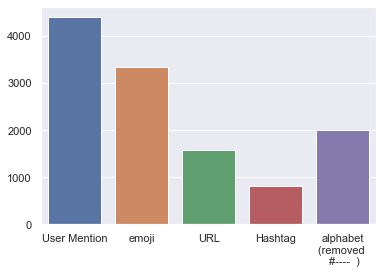

In [17]:
x = ['User Mention', 'emoji', 'URL', 'Hashtag', 'alphabet\n(removed \n #----  )' ]
y = [user_mention_cnt, emoji_cnt, url_cnt, hashtag_cnt, contained_cnt2]

figure = sns.barplot(x, y).get_figure()
# figure.savefig('result1')


/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


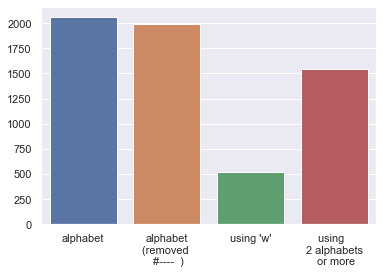

In [18]:
x = ['alphabet', 'alphabet\n(removed \n #----  )', 'using \'w\'', 'using  \n 2 alphabets \n or more' ]
y = [contained_cnt, contained_cnt2, w_cnt, not_single_list_cnt]

figure = sns.barplot(x, y).get_figure()
#figure.savefig('result2')
